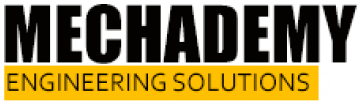

# Propulsion Plants Decay Evaluation
### Problem Statement
#### ⚫ Develop a model, to predict the column
#### ⚫ ‘GT Compressor decay state coefficient’
#### ⚫ GT Turbine decay state coefficient minimizing ‘rmse’ loss function
#### ⚫ Different techniques from ML/DL and share comparative results

Import packages

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

Read dataset

In [2]:
dataset = pd.read_csv("propulsion.csv")
dataset.head(5)

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     10000 non-null  int64  
 1   Lever position (lp) [ ]                        10000 non-null  float64
 2   Ship speed (v) [knots]                         10000 non-null  float64
 3   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 4   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 8   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 9   GT Compressor inlet air temperature (T1) [C]   1000

Checking data for null values

In [4]:
print("\n\nNumber of empty cells in the dataset :\n",'#' * 40)
print("\nDataset : \n",'-' * 20,"\n", dataset.isnull().sum())



Number of empty cells in the dataset :
 ########################################

Dataset : 
 -------------------- 
 Unnamed: 0                                       0
Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor 

The data is clean with no missing values.

Checking data for correlation

<AxesSubplot:>

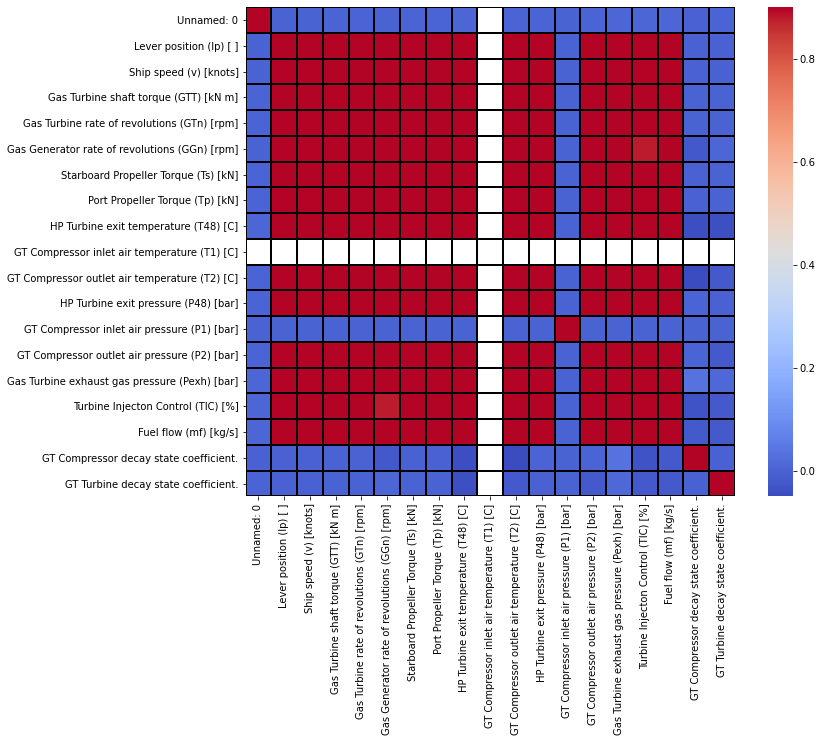

In [5]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, cmap='coolwarm', linecolor='black', linewidths=1, square=True)

The distribution of a univariate dataset.

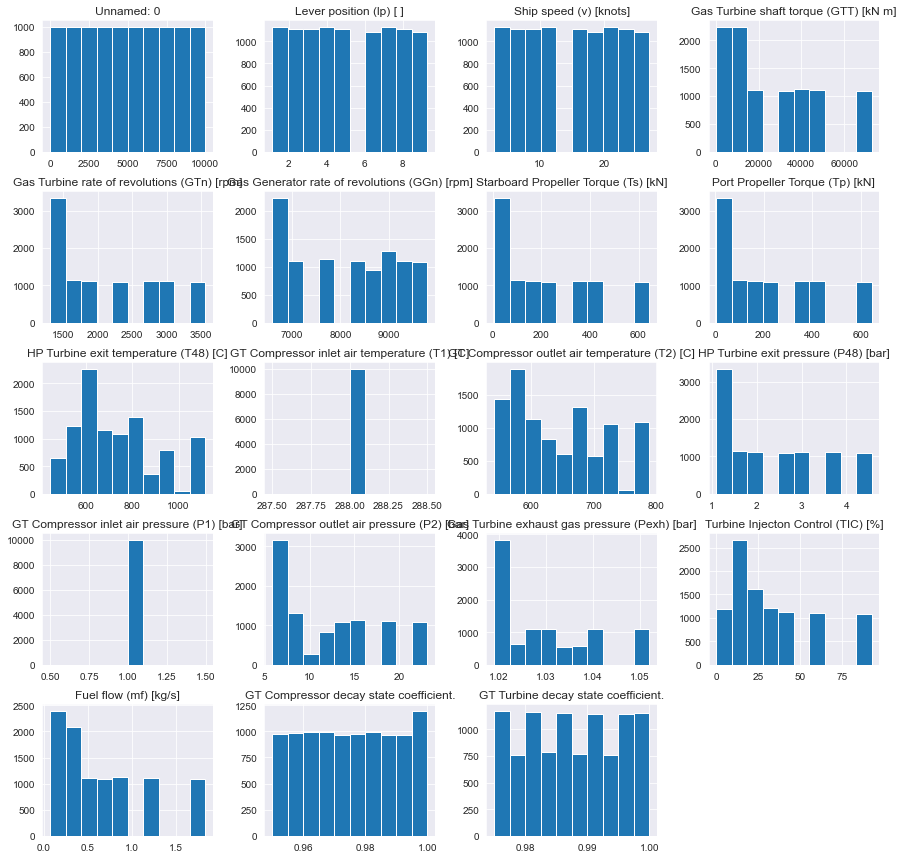

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

dataset.hist(figsize = (15,15))
plt.show()

In [7]:
dataset.describe().round(3)

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.0,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,4999.500,5.150,14.951,27100.648,2131.152,8194.182,225.958,225.958,734.476,288.0,645.749,2.346,0.998,12.263,1.029,33.481,0.659,0.975,0.987
std,2886.896,2.624,7.740,22062.780,772.212,1090.569,199.738,199.738,173.009,0.0,72.483,1.081,0.000,5.321,0.010,25.722,0.505,0.015,0.008
min,0.000,1.138,3.000,253.547,1307.675,6589.002,5.304,5.304,444.731,288.0,540.999,1.093,0.998,5.828,1.019,0.000,0.068,0.950,0.975
25%,2499.750,3.144,9.000,8375.791,1386.758,7056.520,60.317,60.317,589.841,288.0,577.981,1.389,0.998,7.445,1.020,13.534,0.246,0.962,0.981
50%,4999.500,5.140,15.000,21630.134,1924.325,8480.527,175.264,175.264,705.351,288.0,636.800,2.082,0.998,11.086,1.026,25.250,0.496,0.975,0.987
75%,7499.250,7.148,21.000,39000.710,2678.078,9132.132,332.360,332.360,833.155,288.0,693.657,2.981,0.998,15.649,1.036,44.500,0.881,0.988,0.994
max,9999.000,9.300,27.000,72783.338,3560.741,9797.103,645.249,645.249,1115.797,288.0,789.094,4.560,0.998,23.140,1.052,92.556,1.832,1.000,1.000


GT Compressor Inlet Air Temperature T1 and GT Compressor Inlet Air Pressure P1 have zero-variances. This means they are constant numbers.
T1 and P1 should be removed from the data.

Removing redundant features

In [8]:
dataset.drop(['Unnamed: 0','Lever position (lp) [ ]','GT Compressor inlet air temperature (T1) [C]','GT Compressor inlet air pressure (P1) [bar]'],axis=1,inplace=True)

In [9]:
dataset.head(3)

,Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,780.304,4.523,22.879,1.05,90.435,1.790,0.973,0.978
1,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.03,34.596,0.685,0.995,0.975
2,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.02,12.477,0.247,0.980,0.978


Split Data to Training and Test sets

In [10]:
X=dataset.iloc[:,0:13]
target0=dataset.iloc[:,13]
target1=dataset.iloc[:,14]
X_train, X_test, target0_train, target0_test, target1_train, target1_test = train_test_split(X,target0,target1,test_size=0.2,random_state=13)

In [11]:
print('X shape =',X.shape)
print('X_train shape =',X_train.shape)
print('X_test shape =',X_test.shape)
print('target0_train shape =',target0_train.shape)
print('target0_test shape =',target0_test.shape)
print('target1_train shape =',target1_train.shape)
print('target1_test shape =',target1_test.shape)

X shape = (10000, 13)
X_train shape = (8000, 13)
X_test shape = (2000, 13)
target0_train shape = (8000,)
target0_test shape = (2000,)
target1_train shape = (8000,)
target1_test shape = (2000,)


Linear Regression Model

Text(0.5, 1.0, 'Original vs Predicted: $Y_i$ vs $\\hat{Y}_i$')

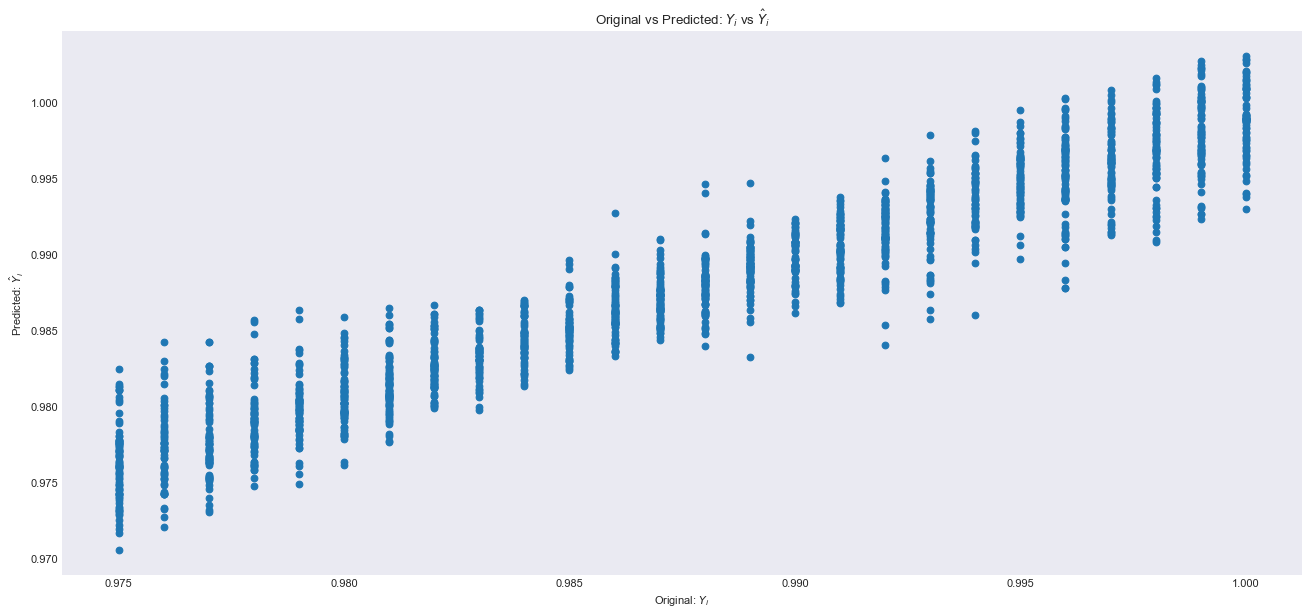

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, target1_train)

Y_pred = lm.predict(X_test)
plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('seaborn-dark')
plt.scatter(target1_test, Y_pred)
plt.xlabel("Original: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Original vs Predicted: $Y_i$ vs $\hat{Y}_i$")

In [13]:
Linear_Regression_target0 = sm.OLS(target0_train, sm.add_constant(X_train)).fit()
Linear_Regression_target0_pred = Linear_Regression_target0.predict(sm.add_constant(X_test))
Linear_Regression_target0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     GT Compressor decay state coefficient.   R-squared:                       0.791
Model:                                                OLS   Adj. R-squared:                  0.790
Method:                                     Least Squares   F-statistic:                     2514.
Date:                                    Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                                            18:03:31   Log-Likelihood:                 28632.
No. Observations:                                    8000   AIC:                        -5.724e+04
Df Residuals:                                        7987   BIC:                        -5.715e+04
Df Model:                                              12                                         
Covariance Type:                                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             4.4877      0.257     17.442      0.000       3.983       4.992
Ship speed (v) [knots]                            0.0044      0.000     21.204      0.000       0.004       0.005
Gas Turbine shaft torque (GTT) [kN m]          5.066e-06   4.54e-07     11.166      0.000    4.18e-06    5.96e-06
Gas Turbine rate of revolutions (GTn) [rpm]      -0.0001   3.39e-06    -34.493      0.000      -0.000      -0.000
Gas Generator rate of revolutions (GGn) [rpm]  1.683e-05    1.1e-06     15.297      0.000    1.47e-05     1.9e-05
Starboard Propeller Torque (Ts) [kN]             -0.0006   2.08e-05    -27.266      0.000      -0.001      -0.001
Port Propeller Torque (Tp) [kN]                  -0.0006   2.08e-05    -27.266      0.000      -0.001      -0.001
HP Turbine exit temperature (T48) [C]            -0.0002   2.53e-05     -9.340      0.000      -0.000      -0.000
GT Compressor outlet air temperature (T2) [C]    -0.0023   3.27e-05    -71.666      0.000      -0.002      -0.002
HP Turbine exit pressure (P48) [bar]              0.2243      0.012     18.061      0.000       0.200       0.249
GT Compressor outlet air pressure (P2) [bar]      0.0254      0.001     23.811      0.000       0.023       0.028
Gas Turbine exhaust gas pressure (Pexh) [bar]    -2.4421      0.251     -9.738      0.000      -2.934      -1.950
Turbine Injecton Control (TIC) [%]               -0.0005   2.25e-05    -21.726      0.000      -0.001      -0.000
Fuel flow (mf) [kg/s]                             0.0467      0.015      3.042      0.002       0.017       0.077
==============================================================================
Omnibus:                      199.135   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.347
Skew:                           0.111   Prob(JB):                     6.63e-25
Kurtosis:                       2.467   Cond. No.                     2.26e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
names = ['Linear_Regression_target0']
MSE = [mean_squared_error(Linear_Regression_target0_pred, target0_test)]
R2 = [r2_score(Linear_Regression_target0_pred, target0_test)]

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))

for name, model in models:

    model.fit(X_train, target0_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(predictions, target0_test)
    r2= r2_score(predictions, target0_test)

    names.append(name)
    MSE.append(mse)
    R2.append(r2)

NameError: name 'Linear_Regression_target0_pred' is not defined

In [ ]:
df1=pd.DataFrame({'1. Model':names,'3. R-squared':R2,'2. Mean Squared Error':MSE})
df1

In [ ]:
Linear_Regression_target1 = sm.OLS(target1_train, sm.add_constant(X_train)).fit()
Linear_Regression_target1_pred = Linear_Regression_target1.predict(sm.add_constant(X_test))
Linear_Regression_target1.summary()

In [ ]:
names = ['Linear_Regression_target1']
MSE = [mean_squared_error(Linear_Regression_target1_pred, target1_test)]
R2 = [r2_score(Linear_Regression_target1_pred, target1_test)]

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))

for name, model in models:

    model.fit(X_train, target1_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(predictions, target1_test)
    r2= r2_score(predictions, target1_test)

    names.append(name)
    MSE.append(mse)
    R2.append(r2)

In [ ]:
df2=pd.DataFrame({'1. Model':names,'3. R-squared':R2,'2. Mean Squared Error':MSE})
df2